# Further SXRD analysis
This notebook is for further analysis of ETMT and SXRD data before comparison to the model

In [1]:
# Firstly, load in the required python libraries and functions:
# libraries and functions from the web:
import numpy as np
import pandas as pd
from matflow import load_workflow
import pickle
from cycler import cycler
import matplotlib.pyplot as plt
# libraries and functions local to this repository:
from utils import import_diff_params
from lattice_strain import lattice_strain
from plotting import plot_latticestrain
from plotting import plot_truestrain_peakint
from plotting import plot_lattice_strain_dist_inc

In [2]:

# next import ETMT and lattice strain data
ETMT_data = pd.read_csv("/mnt/iusers01/jf01/y15576gb/temp_ETMT_data/034/ETMT_output_034.txt")
exp_latticestrain = pickle.load(open('/mnt/iusers01/jf01/y15576gb/temp_ETMT_data/034/exp_lattice_strain.pkl', 'rb'))


In [3]:
ETMT_data

,# Time (s),Load (N),Displacement (mm),Applied Stress (MPa),True Strain,True Stress (MPa),ETMT Temperature (C),Eurotherm Temperature (C),Command Frame Signal (%)
0,215.220,0.915434,0.000000e+00,0.114429,0.000000e+00,0.114429,990.856458,913.974910,1.095360
1,215.220,0.915434,0.000000e+00,0.114429,0.000000e+00,0.114429,990.856458,913.974910,1.095360
2,215.222,0.921562,0.000000e+00,0.115195,0.000000e+00,0.115195,993.318372,913.974910,1.099360
3,215.224,0.956925,0.000000e+00,0.119616,0.000000e+00,0.119616,994.188803,913.974910,1.103360
4,215.226,1.003710,5.122274e-07,0.125464,2.561137e-07,0.125464,992.554973,913.974910,1.107360
...,...,...,...,...,...,...,...,...,...
8276,231.766,2.004970,1.493929e+00,0.250621,5.578798e-01,0.437826,988.887948,916.791335,0.033158
8277,231.768,1.964089,1.493919e+00,0.245511,5.578767e-01,0.428898,990.993077,916.791546,0.032555
8278,231.770,1.889258,1.493907e+00,0.236157,5.578736e-01,0.412556,992.952696,916.791758,0.031953
8279,231.772,1.792195,1.493899e+00,0.224024,5.578712e-01,0.391359,992.426280,916.791969,0.031350


In [36]:
ETMT_true_stress = ETMT_data.iloc[:,5]
ETMT_true_strain = ETMT_data.iloc[:,4]

yield_inc=250 # arbitrary yield increment

# figure out 0.2% proof stress line and yield intercept
youngs_mod = ((ETMT_true_stress[yield_inc]-ETMT_true_stress[0])*1E-3)/(ETMT_true_strain[yield_inc]-ETMT_true_strain[0])
yield_stress = ETMT_true_stress[yield_inc]
print(f"Youngs modulus: {youngs_mod}GPa")
print(f"0.02% proof Yield stress: {yield_stress}MPa")
print(f"strain at yield stress: {ETMT_true_strain[yield_inc]}")

Youngs modulus: 1.089087964376192GPa
0.02% proof Yield stress: 235.7691169953718MPa
strain at yield stress: 0.21637801116819208


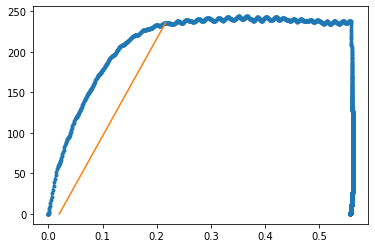

In [45]:
# Plot of true stress-strain
# plt.figure(dpi=300)
# stress strain curve
plt.plot(ETMT_true_strain, ETMT_true_stress, marker='.');
# 0.02% proof stress line
plt.plot([0.02,ETMT_true_strain[yield_inc]], [0.02, ETMT_true_stress[yield_inc]], marker='');

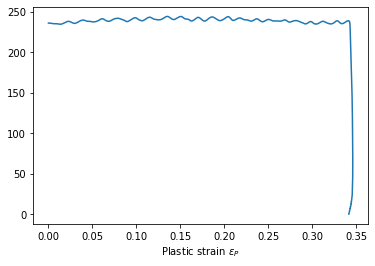

In [43]:
# plot corrected true stress strain for plastic region only
# plt.figure(dpi=300)
plt.plot(ETMT_true_strain[yield_inc:]-ETMT_true_strain[yield_inc], ETMT_true_stress[yield_inc:]);
plt.xlabel(f"Plastic strain $\epsilon_P$");

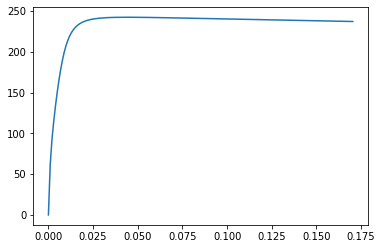

In [52]:
# import model stress strain
path = "/mnt/iusers01/jf01/y15576gb/postprocessing/"
workflow_dir = path+"034_Ti64_TIFUN-T4_TD_910C_elongated_TensionY64x_1mms-1_Xprism_alt0-plastic_CRSS_14_210_140_0_140_224_224_2023-12-19-123807/"
model_stress_strain = pickle.load(open(workflow_dir+'stress_strain.pkl', 'rb'))
model_stress_strain['Y'].keys()
plt.plot(model_stress_strain['Y']['strain'], model_stress_strain['Y']['stress'])